# Power Bi dashboard

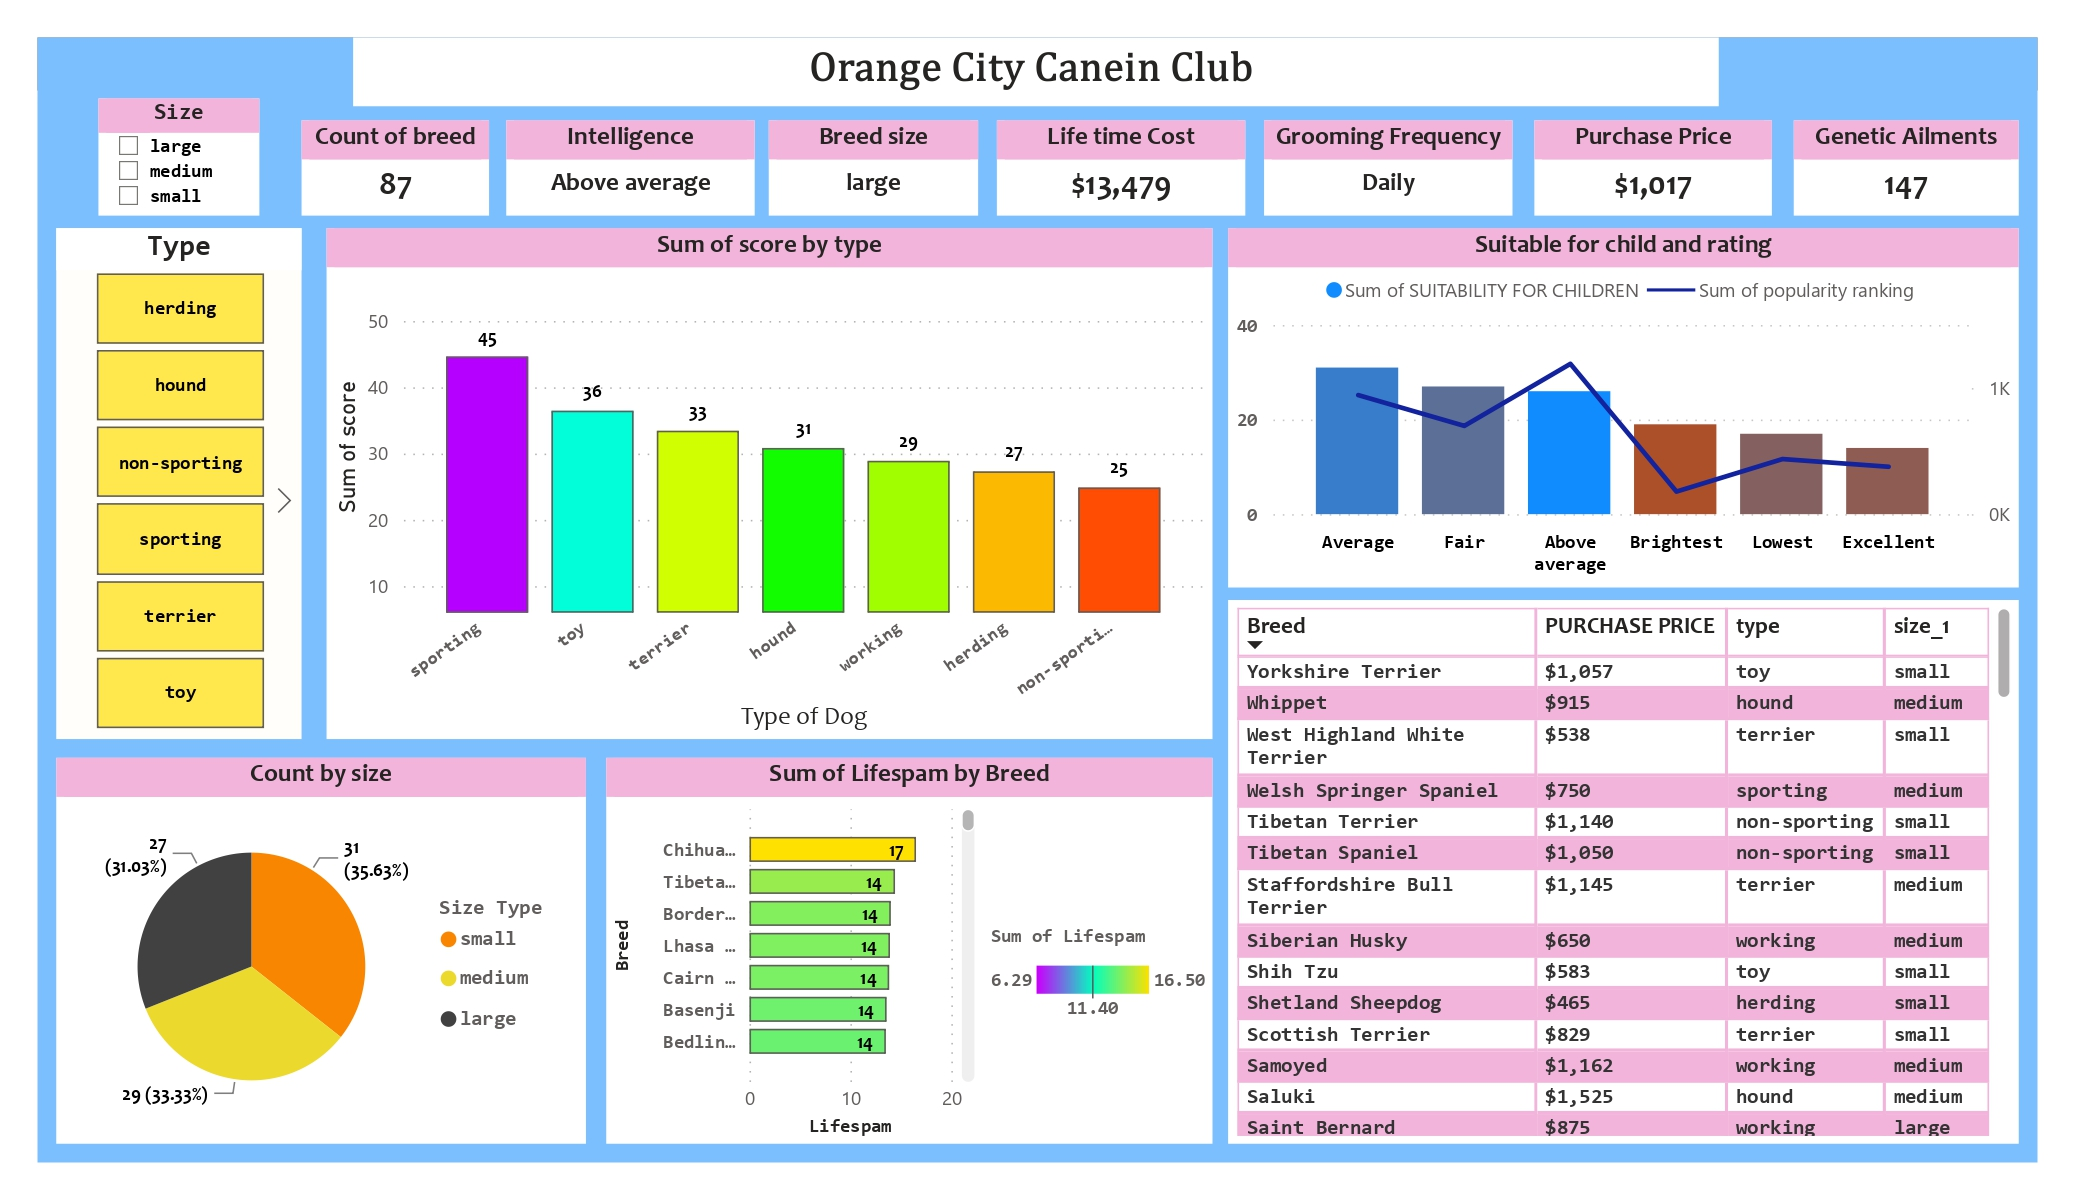

In [1]:
from IPython.display import Image

# Provide the correct path to your image file
img_path = '/Users/pritampathrabe/Downloads/Dexter_Power BI file_page-0001.jpg'
Image(filename=img_path)

## Orange City Canine Club Dataset 

In [2]:
#importing requiired libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.get_current_fig_manager().full_screen_toggle()
import seaborn as sns 

<Figure size 640x480 with 0 Axes>

In [3]:
#Uploading dataset and checking its shape
data=pd.read_csv('dogs-ranking-dataset.csv')
data.shape

(87, 19)

In [4]:
#overview of dataset
data.head()

,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   congential ailments         87 non-null     object 
 7   score for kids              87 non-null     float64
 8   size.1                      87 non-null     object 
 9   $LIFETIME COST              87 non-null     object 
 10  INTELLIGENCE RANK           87 non-null     int64  
 11  INTELLIGENCE %              87 non-null     object 
 12  LONGEVITY(YEARS)            87 non-null     float64
 13  NUMBER OF GENETIC AILMENTS  87 non-nu

In [6]:
#cheaking whether the dataset containg any null value or not 
null_values = data.isnull().sum()
null_percentage = (data.isnull().sum() / len(data)) * 100

null_stats = pd.DataFrame({
    'Column': data.columns,
    'Null Values': null_values.values,
    'Percentage': null_percentage.values
})

print(null_stats)

                        Column  Null Values  Percentage
0                        Breed            0         0.0
1                         type            0         0.0
2                        score            0         0.0
3           popularity ranking            0         0.0
4                         size            0         0.0
5                 intelligence            0         0.0
6          congential ailments            0         0.0
7               score for kids            0         0.0
8                       size.1            0         0.0
9               $LIFETIME COST            0         0.0
10           INTELLIGENCE RANK            0         0.0
11              INTELLIGENCE %            0         0.0
12            LONGEVITY(YEARS)            0         0.0
13  NUMBER OF GENETIC AILMENTS            0         0.0
14            GENETIC AILMENTS            0         0.0
15              PURCHASE PRICE            0         0.0
16         FOOD COSTS PER YEAR            0     

In [7]:
#describing data to see its numerical parameters 
data.describe()

,score,popularity ranking,size,score for kids,INTELLIGENCE RANK,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,SUITABILITY FOR CHILDREN
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,2.603678,44.000000,1.954023,3.681839,41.540230,11.117701,1.689655,1.540230
std,0.570288,25.258662,0.819927,0.655736,21.979803,1.938465,1.707101,0.678655
min,0.990000,1.000000,1.000000,1.860000,1.000000,6.290000,0.000000,1.000000
25%,2.185000,22.500000,1.000000,3.180000,27.000000,10.000000,0.500000,1.000000
50%,2.710000,44.000000,2.000000,3.810000,43.000000,11.560000,1.000000,1.000000
75%,3.035000,65.500000,3.000000,4.115000,59.000000,12.430000,2.000000,2.000000
max,3.640000,87.000000,3.000000,4.990000,80.000000,16.500000,9.000000,3.000000


In [8]:
# Remove '$' and ',' and convert to float
data['$LIFETIME COST'] = data['$LIFETIME COST'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

# Remove '%' and convert to float
data['INTELLIGENCE %'] = data['INTELLIGENCE %'].str.rstrip('%').astype(float)

# Remove '$' and ',' and convert to float
data['PURCHASE PRICE'] = data['PURCHASE PRICE'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

data['FOOD COSTS PER YEAR'] = data['FOOD COSTS PER YEAR'].str.replace('$', '').str.replace(',', '').astype(float)

In [9]:
#creating a new dataset containing object datatype
data_category = data.select_dtypes(include=['object'])

In [10]:
#creating a new dataset containing int, float datatype
data_numeric = data.select_dtypes(include=['int64','float64'])

In [11]:
data_category.head()

,Breed,type,intelligence,congential ailments,size.1,GENETIC AILMENTS,GROOMING FREQUNCY
0,Border Terrier,terrier,Above average,none,small,none,Once a week
1,Cairn Terrier,terrier,Above average,"'lion jaw', heart problems",small,"'lion jaw', heart problems",Once a week
2,Siberian Husky,working,Average,none,medium,none,Once in a few weeks
3,Welsh Springer Spaniel,sporting,Above average,hip problems,medium,hip problems,Once a week
4,English Cocker Spaniel,sporting,Excellent,none,medium,none,Once a week


In [12]:
data_numeric.head()

,score,popularity ranking,size,score for kids,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,SUITABILITY FOR CHILDREN
0,3.61,61,1,4.99,22638.0,30,70.0,14.00,0,833.0,324.0,1
1,3.53,48,1,4.91,21992.0,35,61.0,13.84,2,435.0,324.0,1
2,3.22,16,2,4.72,22049.0,45,45.0,12.58,0,650.0,466.0,1
3,3.34,81,2,4.71,20224.0,31,69.0,12.49,1,750.0,324.0,1
4,3.33,51,2,4.70,18993.0,18,82.0,11.66,0,800.0,324.0,1


### Univariate analysis

In [13]:
#lokking for frequency of particular variable and its value count 
data['type'].value_counts()

type
sporting        15
working         14
toy             13
hound           13
terrier         12
non-sporting    10
herding         10
Name: count, dtype: int64

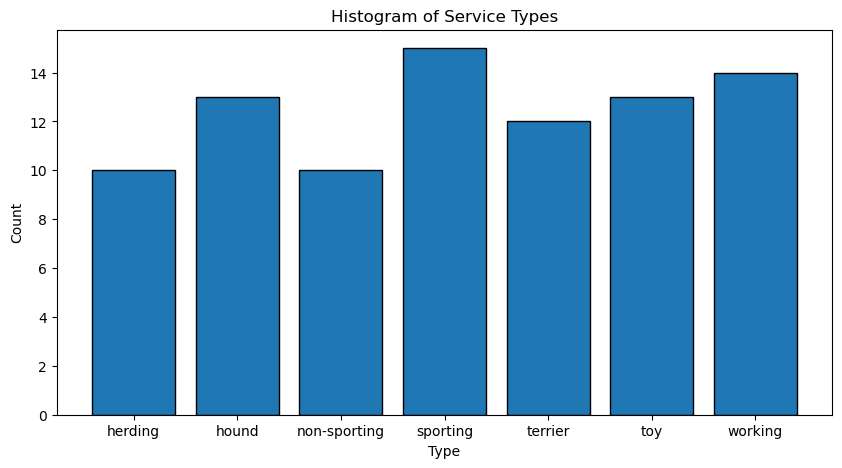

In [14]:
#Count of type of Dog 
Type_count= data['type'].value_counts().sort_index()
plt.figure(figsize=(10, 5))
plt.bar(Type_count.index, Type_count.values, edgecolor='black')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Histogram of Service Types')
plt.show()


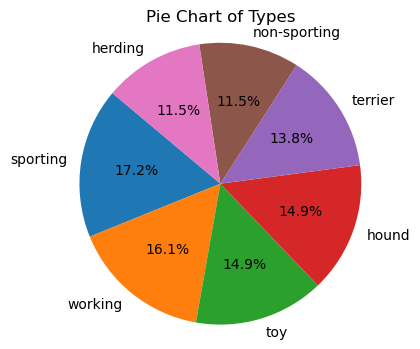

In [15]:
type_counts = data['type'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie Chart of Types")
plt.show()

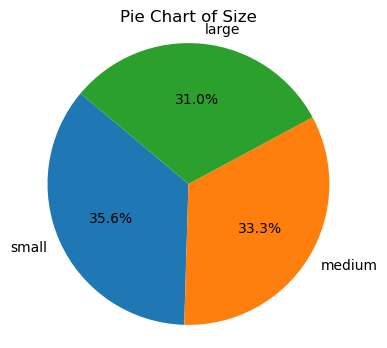

In [16]:
size_counts = data['size.1'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(size_counts, labels=size_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Pie Chart of Size")
plt.show()

In [17]:
#Droping dupplicate column as it has been presentt in the form of munerical format as size 
data = data.drop(columns=['size.1','congential ailments'])


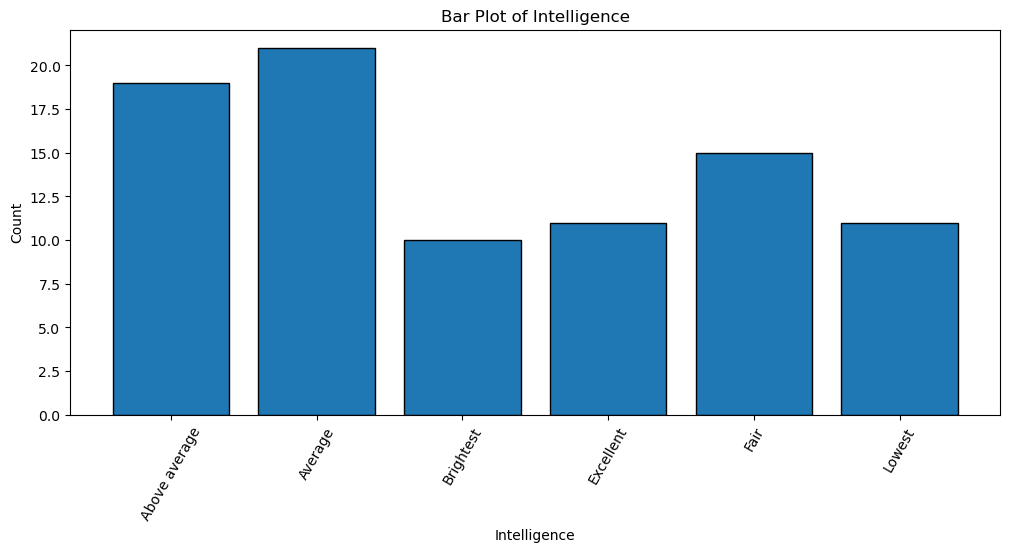

In [18]:
#count of intelligence
intelligence_counts = data['intelligence'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
plt.bar(intelligence_counts.index, intelligence_counts.values, edgecolor='black')
plt.xlabel('Intelligence')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.title('Bar Plot of Intelligence')
plt.show()

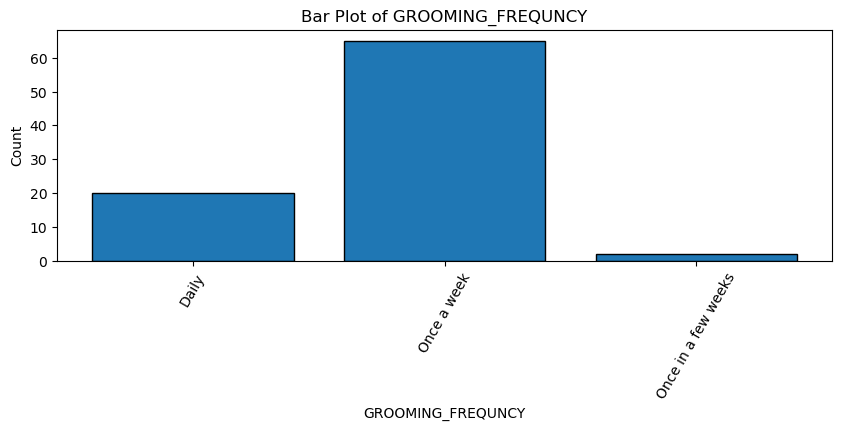

In [19]:
# Count of Grooming Frequency
GROOMING_FREQUNCY=data['GROOMING FREQUNCY'].value_counts().sort_index()
plt.figure(figsize=(10,3))
plt.bar(GROOMING_FREQUNCY.index, GROOMING_FREQUNCY.values, edgecolor='black')
plt.xlabel('GROOMING_FREQUNCY')
plt.xticks(rotation=60)
plt.ylabel('Count')
plt.title('Bar Plot of GROOMING_FREQUNCY')
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

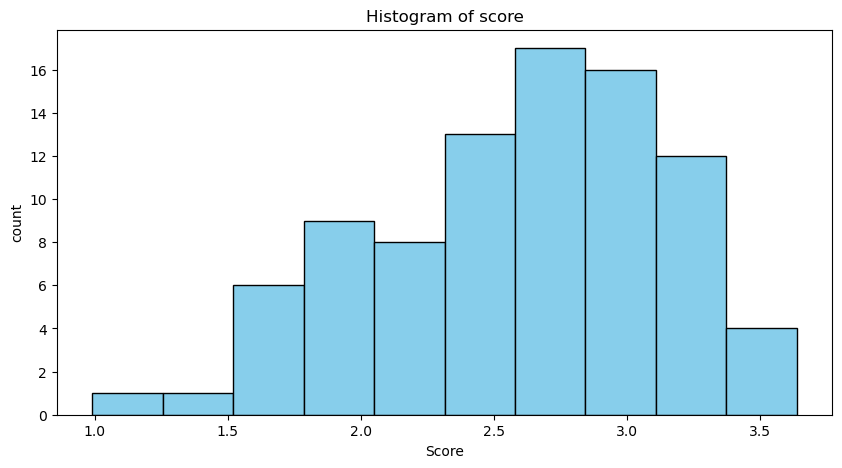

In [20]:
plt.figure(figsize=(10,5))
plt.hist(data['score'],bins=10,color='skyblue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('count')
plt.title('Histogram of score')
plt.show

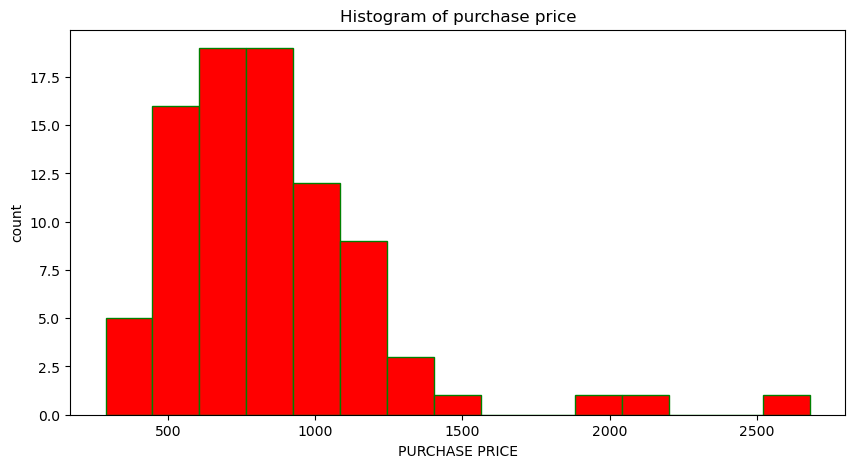

In [21]:
plt.figure(figsize=(10,5))
plt.hist(data['PURCHASE PRICE'], bins=15, color='red',edgecolor='green')
plt.xlabel('PURCHASE PRICE')
plt.ylabel('count')
plt.title('Histogram of purchase price')
plt.show()

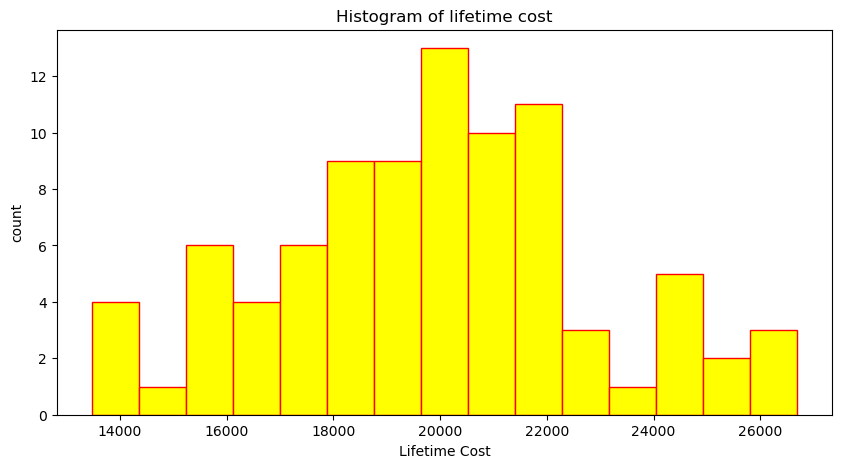

In [22]:

plt.figure(figsize=(10,5))
plt.hist(data['$LIFETIME COST'], bins=15, color='yellow',edgecolor='red')
plt.xlabel('Lifetime Cost')
plt.ylabel('count')
plt.title('Histogram of lifetime cost')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

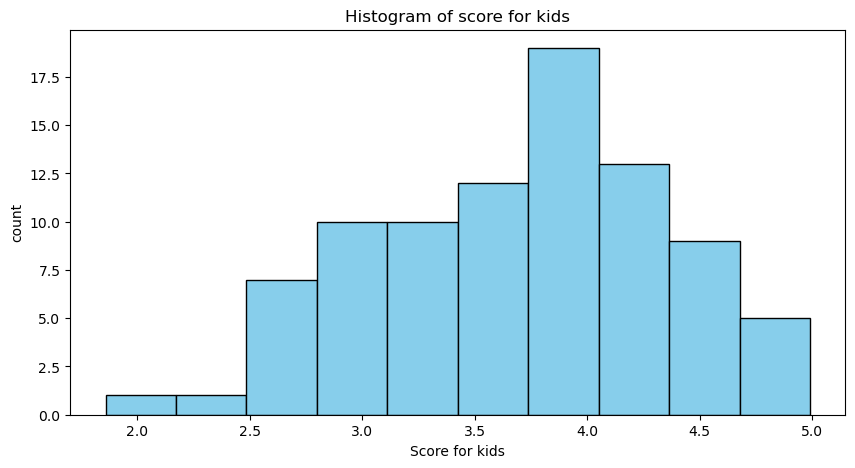

In [23]:
plt.figure(figsize=(10,5))
plt.hist(data['score for kids'],bins=10,color='skyblue', edgecolor='black')
plt.xlabel('Score for kids')
plt.ylabel('count')
plt.title('Histogram of score for kids')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

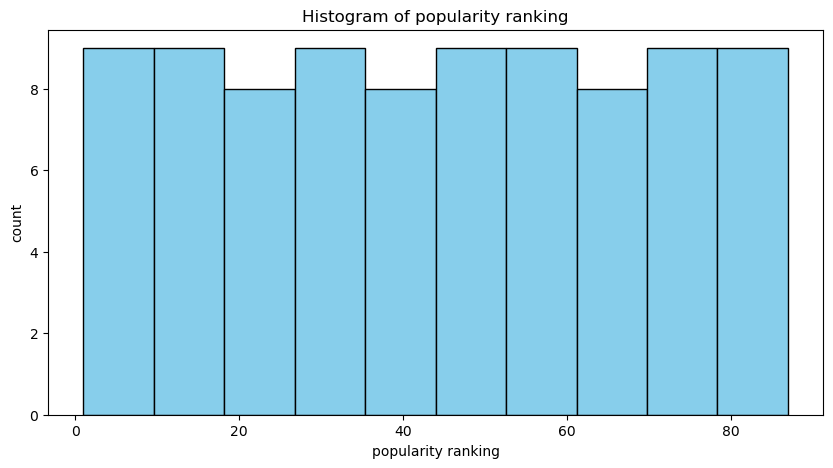

In [24]:
plt.figure(figsize=(10,5))
plt.hist(data['popularity ranking'],bins=10,color='skyblue', edgecolor='black')
plt.xlabel('popularity ranking')
plt.ylabel('count')
plt.title('Histogram of popularity ranking')
plt.show

### Bivariate and Multivariate Analysis


In [25]:
#function to examing whether the variables contain any outlier or not
def UVA_outlier(data, var_group, include_outlier=True):
    size = len(var_group)
    plt.figure(figsize=(20,10), dpi=100)

    for j, i in enumerate(var_group):
        # calculating descriptives of variable
        quant25 = data[i].quantile(0.25)
        quant75 = data[i].quantile(0.75)
        IQR = quant75 - quant25
        med = data[i].median()
        whis_low = med - (1.5 * IQR)
        whis_high = med + (1.5 * IQR)

        # Calculating Number of Outliers
        outlier_high = len(data[i][data[i] > whis_high])
        outlier_low = len(data[i][data[i] < whis_low])

        if include_outlier:
            # Plotting the variable with every information
            plt.subplot(1, size, j + 1)
            sns.boxplot(data[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ))
        else:
            # replacing outliers with max/min whisker
            data2 = data[var_group].copy()
            data2[i][data2[i] > whis_high] = whis_high + 1
            data2[i][data2[i] < whis_low] = whis_low - 1

            # plotting without outliers
            plt.subplot(1, size, j + 1)
            sns.boxplot(data2[i], orient="v")
            plt.ylabel('{}'.format(i))
            plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                round(IQR, 2),
                round(med, 2),
                (round(quant25, 2), round(quant75, 2)),
                (outlier_low, outlier_high)
            ))

    plt.tight_layout()
    plt.show()

In [26]:
column_names_numeric = data_numeric.columns.tolist()
column_names_numeric

['score',
 'popularity ranking',
 'size',
 'score for kids',
 '$LIFETIME COST',
 'INTELLIGENCE RANK',
 'INTELLIGENCE %',
 'LONGEVITY(YEARS)',
 'NUMBER OF GENETIC AILMENTS',
 'PURCHASE PRICE',
 'FOOD COSTS PER YEAR',
 'SUITABILITY FOR CHILDREN']

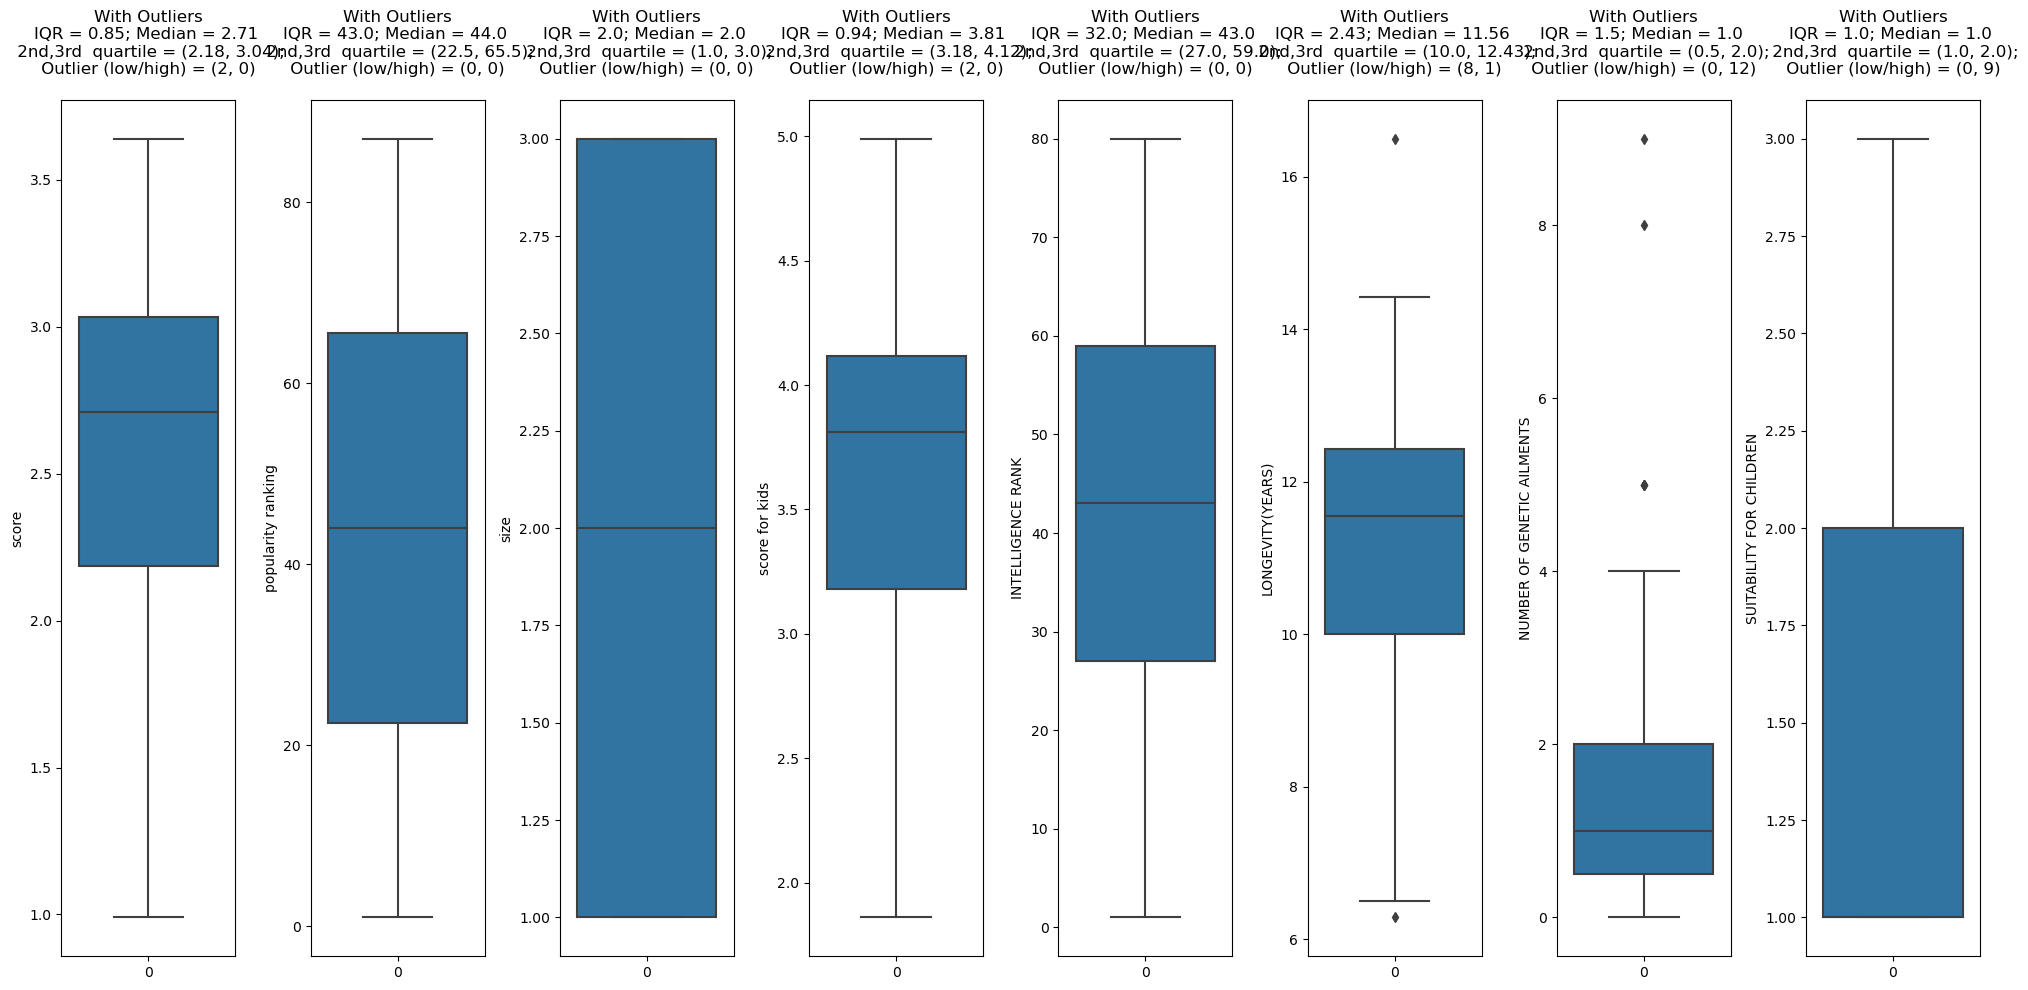

In [27]:
UVA_outlier(data_numeric,['score', 'popularity ranking', 'size', 'score for kids', 'INTELLIGENCE RANK', 'LONGEVITY(YEARS)', 'NUMBER OF GENETIC AILMENTS', 'SUITABILITY FOR CHILDREN'])

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   score for kids              87 non-null     float64
 7   $LIFETIME COST              87 non-null     float64
 8   INTELLIGENCE RANK           87 non-null     int64  
 9   INTELLIGENCE %              87 non-null     float64
 10  LONGEVITY(YEARS)            87 non-null     float64
 11  NUMBER OF GENETIC AILMENTS  87 non-null     int64  
 12  GENETIC AILMENTS            87 non-null     object 
 13  PURCHASE PRICE              87 non-nu

### Changing categorical variable into numerical 

In [29]:
#impoting preprocessing libraries for converting the variable 
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [30]:
data['GROOMING FREQUNCY'].value_counts()

GROOMING FREQUNCY
Once a week            65
Daily                  20
Once in a few weeks     2
Name: count, dtype: int64

In [31]:
data['GROOMING FREQUNCY']=data['GROOMING FREQUNCY'].map({'Once a week':0,'Daily':1,'Once in a few weeks':2})
data['GROOMING FREQUNCY']

0     0
1     0
2     2
3     0
4     0
     ..
82    1
83    0
84    1
85    0
86    0
Name: GROOMING FREQUNCY, Length: 87, dtype: int64

In [32]:
data['type'].value_counts()

type
sporting        15
working         14
toy             13
hound           13
terrier         12
non-sporting    10
herding         10
Name: count, dtype: int64

In [33]:
data['type']=data['type'].map({'sporting':0,'working':1,'toy':2,'hound':3,'terrier':4,'non-sporting':5,'herding':6})
data['type']

0     4
1     4
2     1
3     0
4     0
     ..
82    1
83    3
84    5
85    1
86    5
Name: type, Length: 87, dtype: int64

In [34]:
data['intelligence'].value_counts()

intelligence
Average          21
Above average    19
Fair             15
Excellent        11
Lowest           11
Brightest        10
Name: count, dtype: int64

In [35]:
data['intelligence']=data['intelligence'].map({'Average':0,'Above average':1,'Fair':2,'Excellent':3,'Lowest':4,'Brightest':5})
data['intelligence']

0     1
1     1
2     0
3     1
4     3
     ..
82    0
83    4
84    4
85    0
86    4
Name: intelligence, Length: 87, dtype: int64

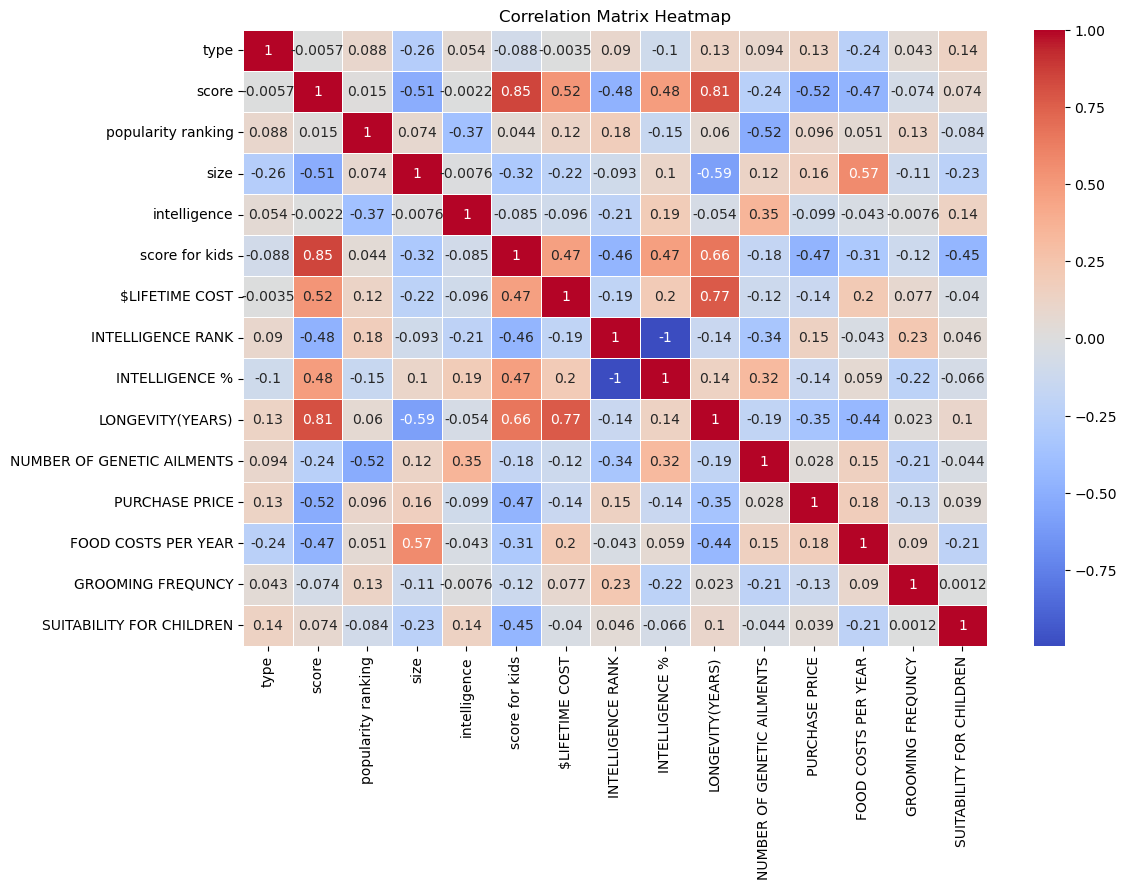

In [36]:
# Checking the correlation between the variables
data_corr = data.select_dtypes(include=['int', 'float'])  
correlation_matrix = data_corr.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [37]:
data['GENETIC AILMENTS'].value_counts()

GENETIC AILMENTS
none                                                                                                   22
hip problems                                                                                           12
heart problems                                                                                          3
deafness, hip problems                                                                                  2
knee problems                                                                                           2
eye, hip problems                                                                                       2
heart, spine, blood clotting disorders                                                                  1
hip problems, heart defects                                                                             1
kidney, eye problems, anaemia                                                                           1
meningitis, elbow + hip probl

In [38]:
data = pd.get_dummies(data, columns=['Breed', 'GENETIC AILMENTS'])
data = data.astype(int)

In [39]:
data

,type,score,popularity ranking,size,intelligence,score for kids,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),...,"GENETIC AILMENTS_kidney, eye problems, anaemia",GENETIC AILMENTS_knee problems,"GENETIC AILMENTS_knee, liver, trachea, eye disorders","GENETIC AILMENTS_liver, eye problems","GENETIC AILMENTS_liver, sinus problems","GENETIC AILMENTS_meningitis, elbow + hip problems, complex immune disorder","GENETIC AILMENTS_nerves, pancreas, blood (hemophilia), hip joints",GENETIC AILMENTS_no data,GENETIC AILMENTS_none,"GENETIC AILMENTS_skin, spinal problems"
0,4,3,61,1,1,4,22638,30,70,14,...,0,0,0,0,0,0,0,0,1,0
1,4,3,48,1,1,4,21992,35,61,13,...,0,0,0,0,0,0,0,0,0,0
2,1,3,16,2,0,4,22049,45,45,12,...,0,0,0,0,0,0,0,0,1,0
3,0,3,81,2,1,4,20224,31,69,12,...,0,0,0,0,0,0,0,0,0,0
4,0,3,51,2,3,4,18993,18,82,11,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,1,1,47,3,0,2,21986,50,36,10,...,0,0,0,0,0,0,0,0,0,0
83,3,1,42,3,4,2,13824,75,7,6,...,0,0,0,0,0,0,0,0,0,0
84,5,1,54,2,4,2,15898,77,5,9,...,0,0,0,0,0,0,0,0,0,0
85,1,1,41,3,0,2,20994,54,31,10,...,0,0,0,0,0,0,0,0,0,0


## Spliting the Dataset

In [40]:
#creating two dataset where x contain all variable except target variable and y contaio only target variable
x=data.drop(['PURCHASE PRICE'],axis=1)
y=data['PURCHASE PRICE']

In [41]:
#importing required libraries 
from sklearn.model_selection import train_test_split

In [42]:
#split dataset in two parts train and test with test size 20%
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=55)
print('x_train =',x_train.shape)
print('y_train =',y_train.shape)
print('x_test =',x_test.shape)
print('y_test =',y_test.shape)

x_train = (69, 151)
y_train = (69,)
x_test = (18, 151)
y_test = (18,)


### Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
# Instance the linear regression object
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)

1.0

In [44]:
y_pred_train = reg.predict(x_train)
y_pred_test = reg.predict(x_test)

In [45]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [46]:
from matplotlib import legend
# Function for evaluation metric for regression
def EvaluationMetric(Xt,yt,yp,disp="on"):
  ''' Take the different set of parameter and prints evaluation metrics '''
  MSE=round(mean_squared_error(y_true=yt,y_pred=yp),4)
  RMSE=(np.sqrt(MSE))
  R2=(r2_score(y_true=yt,y_pred=yp))
  Adjusted_R2=(1-(1-r2_score(yt, yp))*((Xt.shape[0]-1)/(Xt.shape[0]-Xt.shape[1]-1)))
  if disp=="on":
    print("MSE :",MSE,"RMSE :", RMSE)
    print("R2 :",R2,"Adjusted R2 :",Adjusted_R2)

  #Plotting Actual and Predicted Values
  plt.figure(figsize=(18,6))
  plt.plot((yp)[:100]) 
  plt.plot((np.array(yt)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Time Duration')


  
  return (MSE,RMSE,R2,Adjusted_R2) 


MSE : 0.0 RMSE : 0.0
R2 : 1.0 Adjusted R2 : 1.0


(0.0, 0.0, 1.0, 1.0)

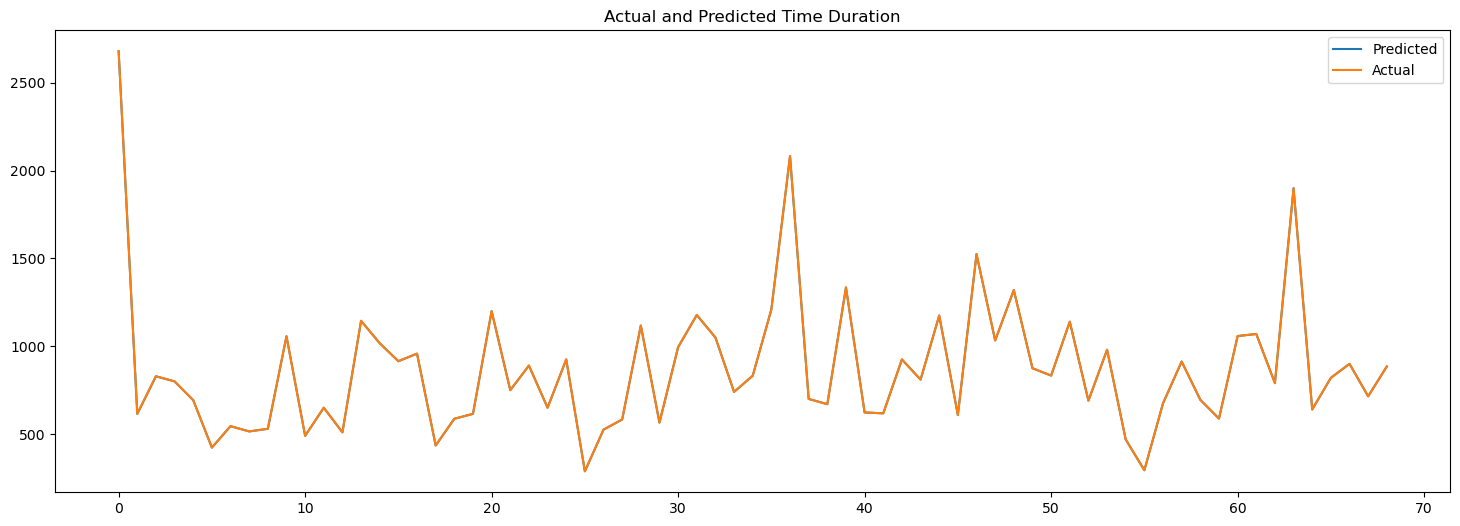

In [47]:
#Evaluation metrics for Train set
EvaluationMetric(x_train,y_train,y_pred_train)

MSE : 36242.6197 RMSE : 190.374945042671
R2 : 0.531253709560429 Adjusted R2 : 1.0594678129662143


(36242.6197, 190.374945042671, 0.531253709560429, 1.0594678129662143)

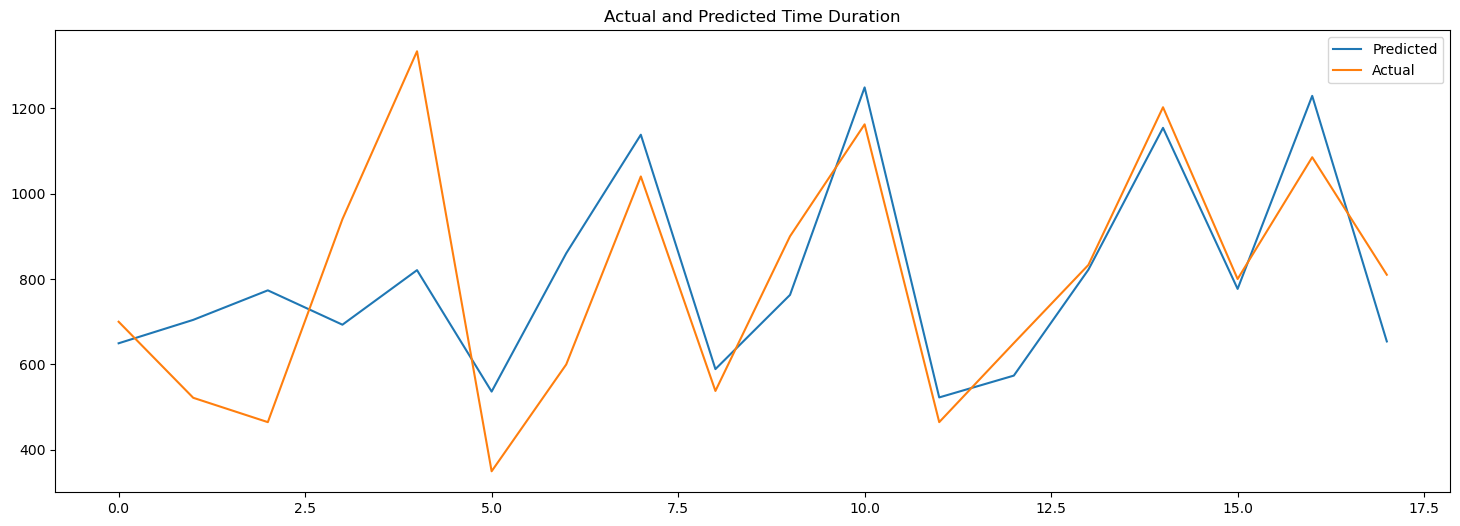

In [48]:
#Evaluation metrics for Test set
EvaluationMetric(x_test,y_test,y_pred_test)

### Decision Tree

In [49]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [50]:
x.shape ,y.shape

((87, 151), (87,))

In [51]:
dt_model = tree.DecisionTreeRegressor()
dt_model = dt_model.fit(x, y)

In [52]:
#checking the training score
dt_model.score(x_train, y_train)

1.0

In [53]:
#test score
dt_model.score(x_test, y_test)

1.0

In [54]:
# Maximum depth of trees
max_depth = [5,10]

# Minimum number of samples required to split a node
min_samples_split = [10,20]

# Minimum number of samples required at each leaf node
min_samples_leaf = [10,20]

# HYperparameter Grid
param_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
dt_model = DecisionTreeRegressor()

# Grid search
dt_grid = GridSearchCV(estimator=dt_model,
                       param_grid = param_dt,
                       cv = 5, verbose=2, scoring='r2')

dt_grid.fit(x_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=10, min_samples_split=20; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=20, min_samples_split=10; total time=   0.0s
[CV] END max_dep

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [5, 10], 'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20]},
             scoring='r2', verbose=2)

In [57]:
dt_grid.best_score_

-0.0317273131918893

In [58]:
dt_grid.best_estimator_

DecisionTreeRegressor(max_depth=5, min_samples_leaf=20, min_samples_split=10)

In [59]:
dt_optimal_model =dt_grid.best_estimator_

In [60]:
y_pred_dt_test=dt_optimal_model.predict(x_test)
y_pred_dt_train=dt_optimal_model.predict(x_train)

MSE : 125128.0001 RMSE : 353.7343637533679
R2 : 0.18263361267317557 Adjusted R2 : 1.669649570340049


(125128.0001, 353.7343637533679, 0.18263361267317557, 1.669649570340049)

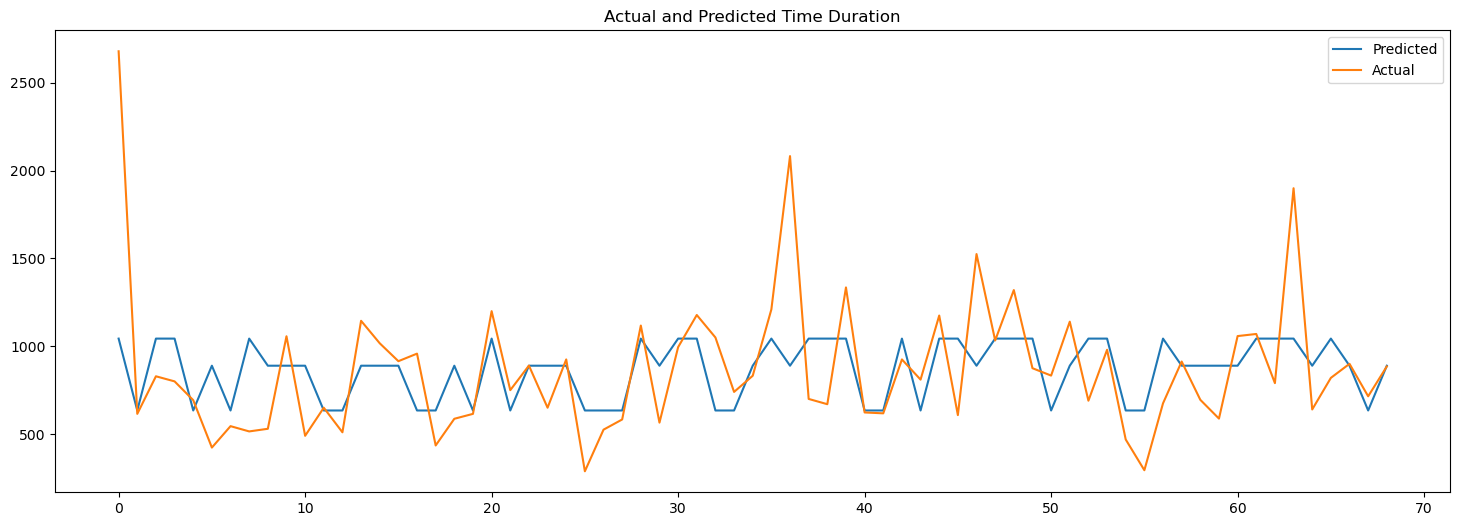

In [61]:
#Evaluation metrics for Train set
EvaluationMetric(x_train,y_train,y_pred_dt_train)

MSE : 50878.9357 RMSE : 225.56359568866606
R2 : 0.3419539604998376 Adjusted R2 : 1.0834834527724087


(50878.9357, 225.56359568866606, 0.3419539604998376, 1.0834834527724087)

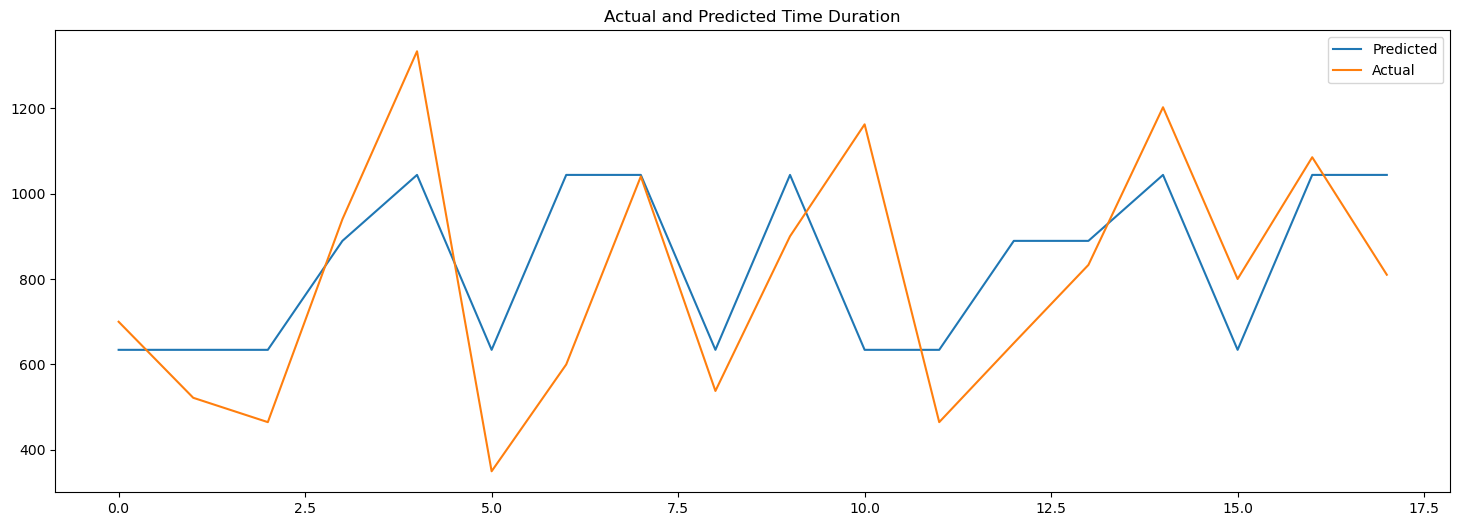

In [62]:
#Evaluation metrics for Test set
EvaluationMetric(x_test,y_test,y_pred_dt_test)